In [71]:
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


import warnings
warnings.filterwarnings("ignore")



In [8]:
no_smile = glob.glob("Data/non_smile/*.jpg")
smile = glob.glob("Data/smile/*.jpg")
test = glob.glob("Data/test/*.jpg")

In [9]:
len(no_smile),len(smile),len(test)

(603, 600, 12030)

In [21]:
img = Image.open(smile[399])

In [22]:
pixel_array = np.array(img)

In [23]:
pixel_array

array([[[195, 160, 106],
        [166, 129,  76],
        [153, 113,  61],
        ...,
        [226, 210, 161],
        [226, 212, 165],
        [232, 218, 173]],

       [[189, 152, 100],
        [162, 125,  72],
        [154, 113,  61],
        ...,
        [223, 205, 157],
        [225, 208, 162],
        [229, 215, 170]],

       [[183, 146,  94],
        [161, 121,  70],
        [154, 113,  61],
        ...,
        [223, 203, 153],
        [222, 204, 158],
        [224, 207, 161]],

       ...,

       [[178, 156, 115],
        [161, 138,  97],
        [124, 101,  59],
        ...,
        [185, 125,  73],
        [186, 126,  76],
        [183, 125,  75]],

       [[183, 161, 120],
        [166, 143, 102],
        [127, 104,  62],
        ...,
        [186, 126,  74],
        [184, 124,  74],
        [180, 122,  72]],

       [[186, 164, 123],
        [169, 146, 105],
        [130, 107,  66],
        ...,
        [185, 125,  73],
        [183, 123,  73],
        [178, 120,  70]]

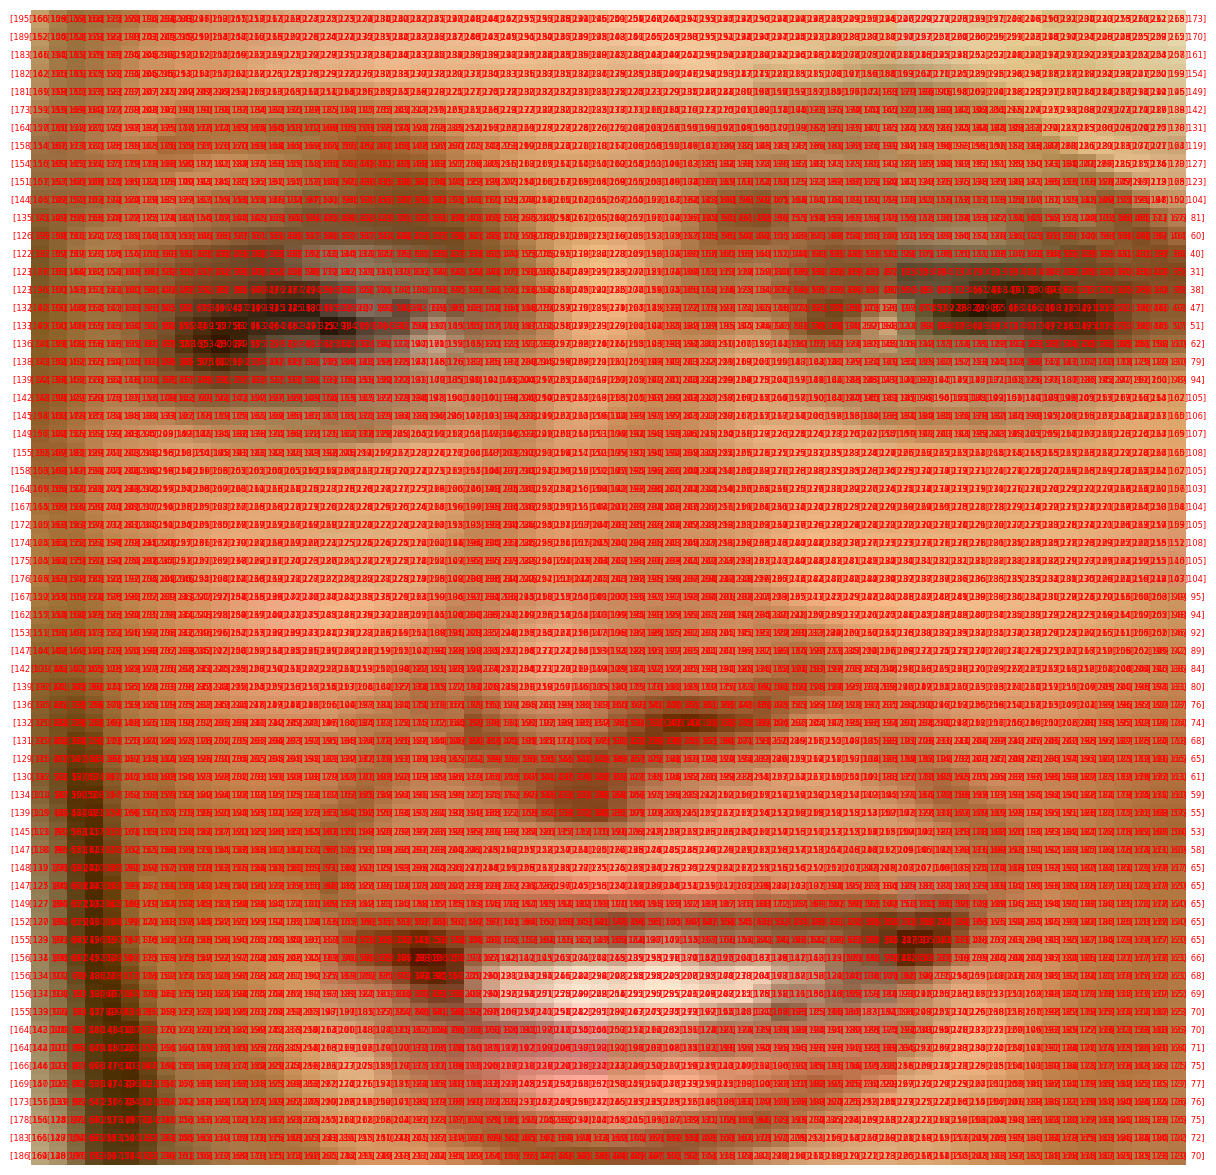

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(pixel_array,cmap="gray",interpolation="nearest")


# show pixel value overlaud the image
for i in range(64):
    for j in range(64):
        plt.text(j,i,pixel_array[i,j],ha="center",va="center",fontsize=6,color = "red")


plt.axis("off")
plt.show()


In [44]:
data = []
labels = []

In [45]:
for image in no_smile:
    img = Image.open(image)
    img = img.convert("L")
    img = np.array(img).flatten()
    data.append(img)
    labels.append(0)

In [46]:
for image in smile:
    img = Image.open(image)
    img = img.convert("L")
    img = np.array(img).flatten()
    data.append(img)
    labels.append(1)

In [47]:
len(data)

1203

In [48]:
data

[array([136, 154, 164, ...,  64,  64,  64], dtype=uint8),
 array([120, 124, 130, ...,  69,  67,  66], dtype=uint8),
 array([24, 17, 27, ..., 11,  3, 11], dtype=uint8),
 array([30, 31, 34, ...,  1,  2,  2], dtype=uint8),
 array([111, 116, 125, ...,   5,   4,   4], dtype=uint8),
 array([ 4,  6, 14, ..., 40, 42, 46], dtype=uint8),
 array([192, 194, 196, ..., 125,  77,  44], dtype=uint8),
 array([121, 132, 143, ...,  24,  23,  22], dtype=uint8),
 array([202, 203, 200, ..., 124, 125, 126], dtype=uint8),
 array([14, 12, 10, ..., 30, 26, 24], dtype=uint8),
 array([134, 133, 133, ...,  15,  14,   9], dtype=uint8),
 array([149, 150, 151, ...,  43,  51,  47], dtype=uint8),
 array([120, 122, 127, ..., 141,  95,  37], dtype=uint8),
 array([ 64,  87, 115, ...,  32,  29,  47], dtype=uint8),
 array([ 80,  91,  95, ...,  94, 113, 123], dtype=uint8),
 array([  8,  15,  23, ..., 130, 130, 131], dtype=uint8),
 array([107, 107, 107, ...,  47,  44,  46], dtype=uint8),
 array([112, 114, 119, ..., 143, 131, 

In [49]:
# dependent and independent variables
X = np.array(data)
y = np.array(labels)

In [50]:
len(y)

1203

In [51]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [52]:
X_train.shape

(962, 4096)

In [54]:
scaler = StandardScaler()

X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled[0]

array([-0.02540282,  0.19722396,  0.4011609 , ..., -1.43245076,
       -1.41053727, -1.37453322])

In [58]:
# model training
model = LogisticRegression()

model.fit(X_train_scaled,y_train)

LogisticRegression()

In [59]:
y_pred = model.predict(X_test_scaled)

In [61]:
model.predict_proba(X_test_scaled)

array([[6.95385583e-06, 9.99993046e-01],
       [2.30101450e-01, 7.69898550e-01],
       [9.89954940e-01, 1.00450595e-02],
       [2.96229707e-11, 1.00000000e+00],
       [1.00000000e+00, 6.33333596e-12],
       [9.94252681e-01, 5.74731878e-03],
       [2.75175072e-07, 9.99999725e-01],
       [9.99995294e-01, 4.70611607e-06],
       [4.74673278e-09, 9.99999995e-01],
       [1.93305312e-04, 9.99806695e-01],
       [5.57950700e-03, 9.94420493e-01],
       [3.61843353e-08, 9.99999964e-01],
       [9.99999908e-01, 9.22715315e-08],
       [9.91507734e-01, 8.49226574e-03],
       [9.99999999e-01, 6.57235039e-10],
       [9.99999926e-01, 7.36524896e-08],
       [2.84461951e-02, 9.71553805e-01],
       [9.99922653e-01, 7.73471035e-05],
       [1.95145352e-08, 9.99999980e-01],
       [9.99993893e-01, 6.10697908e-06],
       [4.03573397e-09, 9.99999996e-01],
       [1.33518556e-02, 9.86648144e-01],
       [9.96992255e-01, 3.00774485e-03],
       [3.69499129e-08, 9.99999963e-01],
       [9.996481

In [67]:
print("Base line model")
print(f"Accuracy: {accuracy_score(y_test,y_pred):.4f}")
print("confusion_matrix\n",confusion_matrix(y_test,y_pred))
print("classification_report \n",classification_report(y_test,y_pred))

Base line model
Accuracy: 0.8921
confusion_matrix
 [[114  12]
 [ 14 101]]
classification_report 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       126
           1       0.89      0.88      0.89       115

    accuracy                           0.89       241
   macro avg       0.89      0.89      0.89       241
weighted avg       0.89      0.89      0.89       241



In [73]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param = {
    "penalty":['l1','l2','elasticnet'],
    "C":[0.01,0.1,1,10,100],
    "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [74]:
grid = GridSearchCV(estimator=model,param_grid=param,cv=5,n_jobs=-1)

grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [75]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [76]:
grid.best_score_

0.8814550949913645

In [105]:
# prediction on new data 
img = Image.open("mysamples/ajith-hd-adorable-smiling-exh6rixtqnwasu74.jpg")


In [106]:
img = img.resize((64,64))


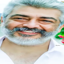

In [107]:
img

In [108]:
img = img.convert("L")

In [109]:
image_array = np.array(img).flatten()

In [110]:
image_array.shape

(4096,)

In [111]:
scaled_array = scaler.transform(image_array.reshape(1,-1))

In [112]:
model.predict(scaled_array)

array([1])

In [113]:
import pickle



pickle.dump(model,open("model.pkl","wb"))

In [114]:
pickle.dump(scaler,open("scaler.pkl","wb"))